In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Ejemplo 1: Clasificación simple con un árbol de decisión
from sklearn.datasets import make_classification
# 1. Generar un conjunto de datos sintético para clasificación binaria
X_class, y_class = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 2. Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


Accuracy del Gradient Boosting (Clasificación): 0.80


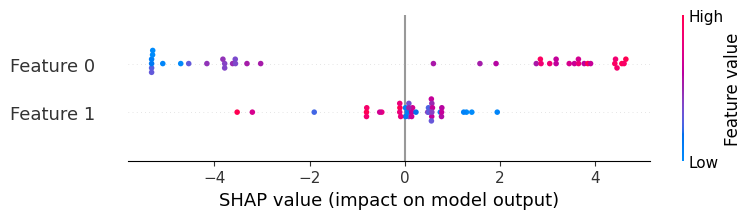

In [5]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train_c, y_train_c)

y_pred_gb = gb_classifier.predict(X_test_c)
accuracy_gb = accuracy_score(y_test_c, y_pred_gb)
print(f'Accuracy del Gradient Boosting (Clasificación): {accuracy_gb:.2f}')

explainer = shap.Explainer(gb_classifier, X_train_c)
shap_values = explainer(X_test_c)
shap.summary_plot(shap_values, X_test_c)

In [6]:
X_reg = np.linspace(-3, 3, 200).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


MSE del Gradient Boosting (Regresión): 0.0174


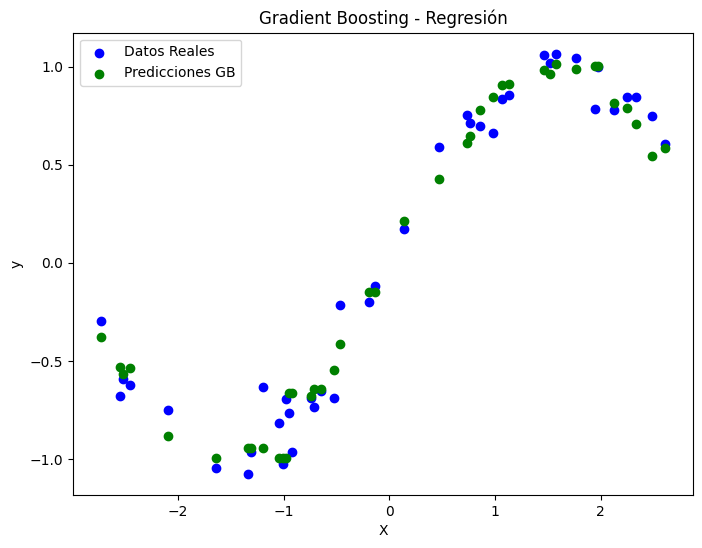

In [8]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train_r, y_train_r)

y_pred_gb_r = gb_regressor.predict(X_test_r)
mse_gb = mean_squared_error(y_test_r, y_pred_gb_r)
print(f'MSE del Gradient Boosting (Regresión): {mse_gb:.4f}')

# Visualización del resultado de la regresión con Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(X_test_r, y_test_r, color='blue', label='Datos Reales')
plt.scatter(X_test_r, y_pred_gb_r, color='green', label='Predicciones GB')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Boosting - Regresión')
plt.show()

